# 3. Comparison of IsoHD splicing events with post-mortem HD patient data

In [1]:
library(dplyr)
library(ggplot2)
library(biomaRt)
library(org.Hs.eg.db)
library(clusterProfiler)
library(pheatmap)
library(DT)
library(dendextend)
library(dendsort)
library(ggplotify)
library(gridExtra)
library(reshape2)
library(Mfuzz)
library(enrichplot)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames

# 3.1. VastDB annotated splicing events in IsoHD, HD cortex, HD striatum

In [2]:
leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv <- read.table(
    file='leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv',
    sep='\t'
)

leafcutterAStable_human_cortex_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv <- read.table(
    file='leafcutterAStable_human_cortex_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv',
    sep='\t'
)

leafcutterAStable_human_striatum_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv <- read.table(
    file='leafcutterAStable_human_striatum_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv',
    sep='\t'
)


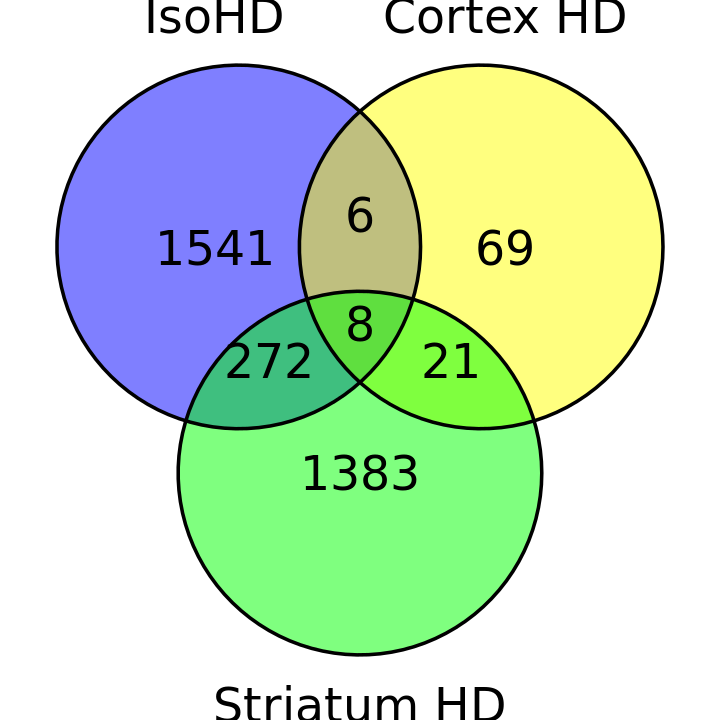

In [3]:
options(repr.plot.height=6,repr.plot.width=6)
ggvenn::ggvenn(
    data=list(
        'IsoHD'=leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        subset(DiffSplicing.test!='Cell_type_NPCvsESC') %>% 
        with(gsub('-[0-9]/[0-9]$','',EVENT) %>% na.omit %>% unique),
        'Cortex HD'=leafcutterAStable_human_cortex_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        with(gsub('-[0-9]/[0-9]$','',EVENT) %>% na.omit %>% unique),
        'Striatum HD'=leafcutterAStable_human_striatum_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        with(gsub('-[0-9]/[0-9]$','',EVENT) %>% na.omit %>% unique)
    ),
    fill_color=c("blue","yellow","green", "red"),
    show_percentage=FALSE,
    set_name_size=10,
    text_size=10
)


In [4]:
list(
    'IsoHD'=leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    subset(DiffSplicing.test!='Cell_type_NPCvsESC') %>% 
    with(JunctionName %>% na.omit %>% unique %>% sort),
    'Cortex HD'=leafcutterAStable_human_cortex_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    with(JunctionName %>% na.omit %>% unique %>% sort),
    'Striatum HD'=leafcutterAStable_human_striatum_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    with(JunctionName %>% na.omit %>% unique %>% sort)
) %>% 
lapply(length)


$IsoHD
[1] 5255

$`Cortex HD`
[1] 332

$`Striatum HD`
[1] 5919

In [5]:
leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents.tsv %>% 
subset(DiffSplicing.test!='Cell_type_NPCvsESC' & (EVENT %in% (Reduce(intersect,list(
    'IsoHD'=leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    subset(DiffSplicing.test!='Cell_type_NPCvsESC') %>% 
    with(EVENT %>% na.omit %>% unique),
    'Cortex HD'=leafcutterAStable_human_cortex_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    with(EVENT %>% na.omit %>% unique),
    'Striatum HD'=leafcutterAStable_human_striatum_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    with(EVENT %>% na.omit %>% unique)
))))) %>% 
with(genes %>% unique %>% sort)


[1] "BCOR"   "CAMK2G" "CPSF7"  "EHBP1"  "KCNMA1" "PTPRM"  "RPRD2"  "TBC1D5"

## 3.2. Overlapping IsoHD-cortex HD-striatum HD DSJs

In [6]:
intersect(
    leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    subset(grepl('_disease_stage_',DiffSplicing.test)) %>% 
    with(gsub('-[0-9]/[0-9]$','',EVENT)) %>% na.omit %>% unique,
    leafcutterAStable_human_striatum_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    with(gsub('-[0-9]/[0-9]$','',EVENT)) %>% na.omit %>% unique
) %>% unique %>% length

intersect(
    leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    subset(grepl('_disease_stage_',DiffSplicing.test)) %>% 
    with(gsub('-[0-9]/[0-9]$','',EVENT)) %>% na.omit %>% unique,
    leafcutterAStable_human_cortex_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
    with(gsub('-[0-9]/[0-9]$','',EVENT)) %>% na.omit %>% unique
) %>% unique %>% length


[1] 280

[1] 14

In [7]:
intersect(
        leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        subset(grepl('_disease_stage_',DiffSplicing.test)) %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique,
        leafcutterAStable_human_striatum_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique
    ) %>% unique %>% length

intersect(
        leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        subset(grepl('_disease_stage_',DiffSplicing.test)) %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique,
        leafcutterAStable_human_cortex_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique
    ) %>% unique %>% length


[1] 988

[1] 53

In [8]:
c(
    intersect(
        leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        subset(grepl('_disease_stage_',DiffSplicing.test)) %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique,
        leafcutterAStable_human_striatum_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique
    ),
    intersect(
        leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        subset(grepl('_disease_stage_',DiffSplicing.test)) %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique,
        leafcutterAStable_human_cortex_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique
    )
) %>% unique %>% length


[1] 1012

In [9]:
isohdcortexstriatum.alljunctions.naomit <- c(
    intersect(
        leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        subset(grepl('_disease_stage_',DiffSplicing.test)) %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique,
        leafcutterAStable_human_striatum_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique
    ),
    intersect(
        leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        subset(grepl('_disease_stage_',DiffSplicing.test)) %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique,
        leafcutterAStable_human_cortex_HD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
        with(gsub('clu_[0-9]*_','',JunctionName)) %>% unique
    )
) %>% unique %>% 
(function(juncnames) {
    Reduce(f=intersect,x=list(
        readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
            juncnames,
            coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('hESC',Celltype)) %>% row.names
        ],
        readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
            juncnames,
            coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('NPC',Celltype)) %>% row.names
        ],
        readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
            juncnames,
            coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('Neuron',Celltype)) %>% row.names
        ],
        readsunique.novel.human_cortex_hd_perind_logit.constcounts.known2[juncnames,],
        readsunique.novel.human_striatum_hd_perind_logit.constcounts.known2[juncnames,]
    ) %>% 
    lapply(function(x) {
        x %>% 
        t %>% scale %>% t %>% 
        na.omit %>% 
        row.names
    }))
}) %>% 
unlist %>% unique


In [10]:
isohdcortexstriatum.alljunctions.naomit %>% length


[1] 710

## 3.3. Fuzzy clustering of shared DSJs

In [11]:
isohdcortexstriatum.Dmin <- cbind(
    readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
        isohdcortexstriatum.alljunctions.naomit,
        coldata_ESCNPCNeu_isoHD2 %>% subset(Celltype=='hESC') %>% row.names
    ] %>% 
    t %>% scale %>% t,
    readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
        isohdcortexstriatum.alljunctions.naomit,
        coldata_ESCNPCNeu_isoHD2 %>% subset(Celltype=='NPC') %>% row.names
    ] %>% 
    t %>% scale %>% t,
    readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
        isohdcortexstriatum.alljunctions.naomit,
        coldata_ESCNPCNeu_isoHD2 %>% subset(Celltype=='Neuron') %>% row.names
    ] %>% 
    t %>% scale %>% t
) %>% 
ExpressionSet(
    phenoData=coldata_ESCNPCNeu_isoHD2[
        c(coldata_ESCNPCNeu_isoHD2 %>% subset(Celltype=='hESC') %>% row.names,coldata_ESCNPCNeu_isoHD2[-c(8,14,21),] %>% subset(Celltype=='NPC') %>% row.names,coldata_ESCNPCNeu_isoHD2[-c(8,14,21),] %>% subset(Celltype=='Neuron') %>% row.names),
    ] %>% AnnotatedDataFrame
) %>% 
(function(myexprset) {
    myexprset %>% 
    Dmin(
        m=myexprset %>% mestimate,
        crange=2:10,
        repeats=5,
        visu=FALSE
    )
})


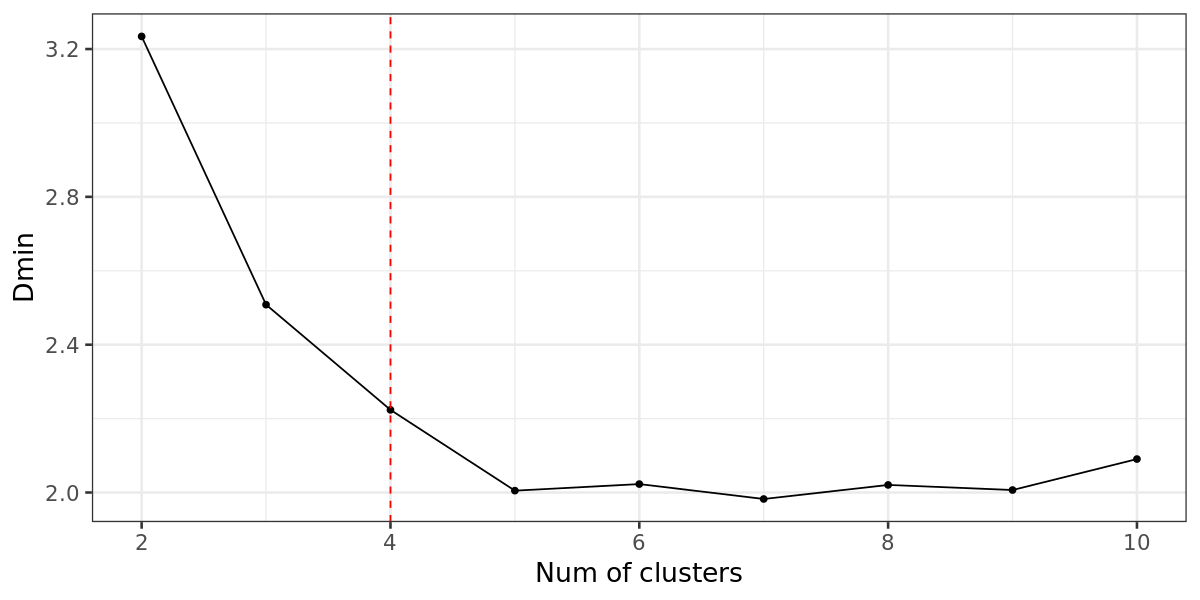

In [12]:
options(repr.plot.width=10,repr.plot.height=5)
ggplot(
    mapping=aes(
        x=2:10,
        y=isohdcortexstriatum.Dmin
    )
) +
geom_point() +
geom_line() +
geom_vline(xintercept=4,color='red',linetype='dashed') +
labs(x='Num of clusters',y='Dmin') +
theme_bw(base_size=16)


In [13]:
isohdcortexstriatum.mfuzz.list <- c(2:5) %>% 
lapply(function(x) {
    myexprset <- cbind(
        readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
            isohdcortexstriatum.alljunctions.naomit,
            coldata_ESCNPCNeu_isoHD2 %>% subset(Celltype=='hESC') %>% row.names
        ] %>% 
        t %>% scale %>% t,
        readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
            isohdcortexstriatum.alljunctions.naomit,
            coldata_ESCNPCNeu_isoHD2 %>% subset(Celltype=='NPC') %>% row.names
        ] %>% 
        t %>% scale %>% t,
        readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
            isohdcortexstriatum.alljunctions.naomit,
            coldata_ESCNPCNeu_isoHD2 %>% subset(Celltype=='Neuron') %>% row.names
        ] %>% 
        t %>% scale %>% t
    ) %>% 
    ExpressionSet(
        phenoData=coldata_ESCNPCNeu_isoHD2[
            c(coldata_ESCNPCNeu_isoHD2 %>% subset(Celltype=='hESC') %>% row.names,coldata_ESCNPCNeu_isoHD2[-c(8,14,21),] %>% subset(Celltype=='NPC') %>% row.names,coldata_ESCNPCNeu_isoHD2[-c(8,14,21),] %>% subset(Celltype=='Neuron') %>% row.names),
        ] %>% AnnotatedDataFrame
    )
    
    myexprset %>% 
    mfuzz(centers=x,m=myexprset %>% mestimate)
}) %>% setNames(nm=c(2:5))


In [14]:
boxplotglist <- list()

boxplotglist[['hesc']] <- readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('ESC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
subset(membership>=.6) %>% 
ggplot(
    mapping=aes(
        x=Var2 %>% factor(
            levels=coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('ESC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names,
            labels=gsub('readsunique.novel.|.bed','',coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('ESC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names)
        ),
        y=value
    )
) +
geom_boxplot(outlier.alpha=0) +
geom_hline(yintercept=0,linetype='dashed') +
facet_grid(
    facets=cluster~'isoHD: hESC',
    labeller=labeller(cluster=c('1'='Cluster 1','2'='Cluster 2','3'='Cluster 3','4'='Cluster 4','5'='Cluster 5'))
) +
theme_bw(base_size=16) +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5)) +
labs(x='',y='Scaled PSI')

boxplotglist[['npc']] <- readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('NPC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
subset(membership>=.6) %>% 
ggplot(
    mapping=aes(
        x=Var2 %>% factor(
            levels=coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('NPC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names,
            labels=gsub('readsunique.novel.|.bed','',coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('NPC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names)
        ),
        y=value
    )
) +
geom_boxplot(outlier.alpha=0) +
geom_hline(yintercept=0,linetype='dashed') +
facet_grid(
    facets=cluster~'isoHD: NPC',
    labeller=labeller(cluster=c('1'='Cluster 1','2'='Cluster 2','3'='Cluster 3','4'='Cluster 4','5'='Cluster 5'))
) +
theme_bw(base_size=16) +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5)) +
labs(x='',y='Scaled PSI')

boxplotglist[['neuron']] <- readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('Neuron',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
subset(membership>=.6) %>% 
ggplot(
    mapping=aes(
        x=Var2 %>% factor(
            levels=coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('Neuron',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names,
            labels=gsub('readsunique.novel.|.bed','',coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('Neuron',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names)
        ),
        y=value
    )
) +
geom_boxplot(outlier.alpha=0) +
geom_hline(yintercept=0,linetype='dashed') +
facet_grid(
    facets=cluster~'isoHD: Neuron',
    labeller=labeller(cluster=c('1'='Cluster 1','2'='Cluster 2','3'='Cluster 3','4'='Cluster 4','5'='Cluster 5'))
) +
theme_bw(base_size=16) +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5)) +
labs(x='',y='Scaled PSI')

boxplotglist[['cortex']] <- readsunique.novel.human_cortex_hd_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_cortex_hd %>% arrange(Diagnosis) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
subset(membership>=.6) %>% 
ggplot(
    mapping=aes(
        x=Var2 %>% factor(
            levels=coldata_cortex_hd %>% arrange(Diagnosis) %>% row.names,
            labels=gsub('readsunique.novel.|.bed','',coldata_cortex_hd %>% arrange(Diagnosis) %>% row.names)
        ),
        y=value
    )
) +
geom_boxplot(outlier.alpha=0) +
geom_hline(yintercept=0,linetype='dashed') +
facet_grid(
    facets=cluster~'Cortex HD',
    labeller=labeller(cluster=c('1'='Cluster 1','2'='Cluster 2','3'='Cluster 3','4'='Cluster 4','5'='Cluster 5'))
) +
theme_bw(base_size=16) +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5)) +
labs(x='',y='Scaled PSI')

boxplotglist[['striatum']] <- readsunique.novel.human_striatum_hd_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_Striatum_HD %>% arrange(Condition) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
subset(membership>=.6) %>% 
ggplot(
    mapping=aes(
        x=Var2 %>% factor(
            levels=coldata_Striatum_HD %>% arrange(Condition) %>% row.names,
            labels=gsub('readsunique.novel.|.bed','',coldata_Striatum_HD %>% arrange(Condition) %>% row.names)
        ),
        y=value
    )
) +
geom_boxplot(outlier.alpha=0) +
geom_hline(yintercept=0,linetype='dashed') +
facet_grid(
    facets=cluster~'Striatum HD',
    labeller=labeller(cluster=c('1'='Cluster 1: 107','2'='Cluster 2: 129','3'='Cluster 3: 129','4'='Cluster 4: 146','5'='Cluster 5'))
) +
theme_bw(base_size=16) +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5)) +
labs(x='',y='Scaled PSI')


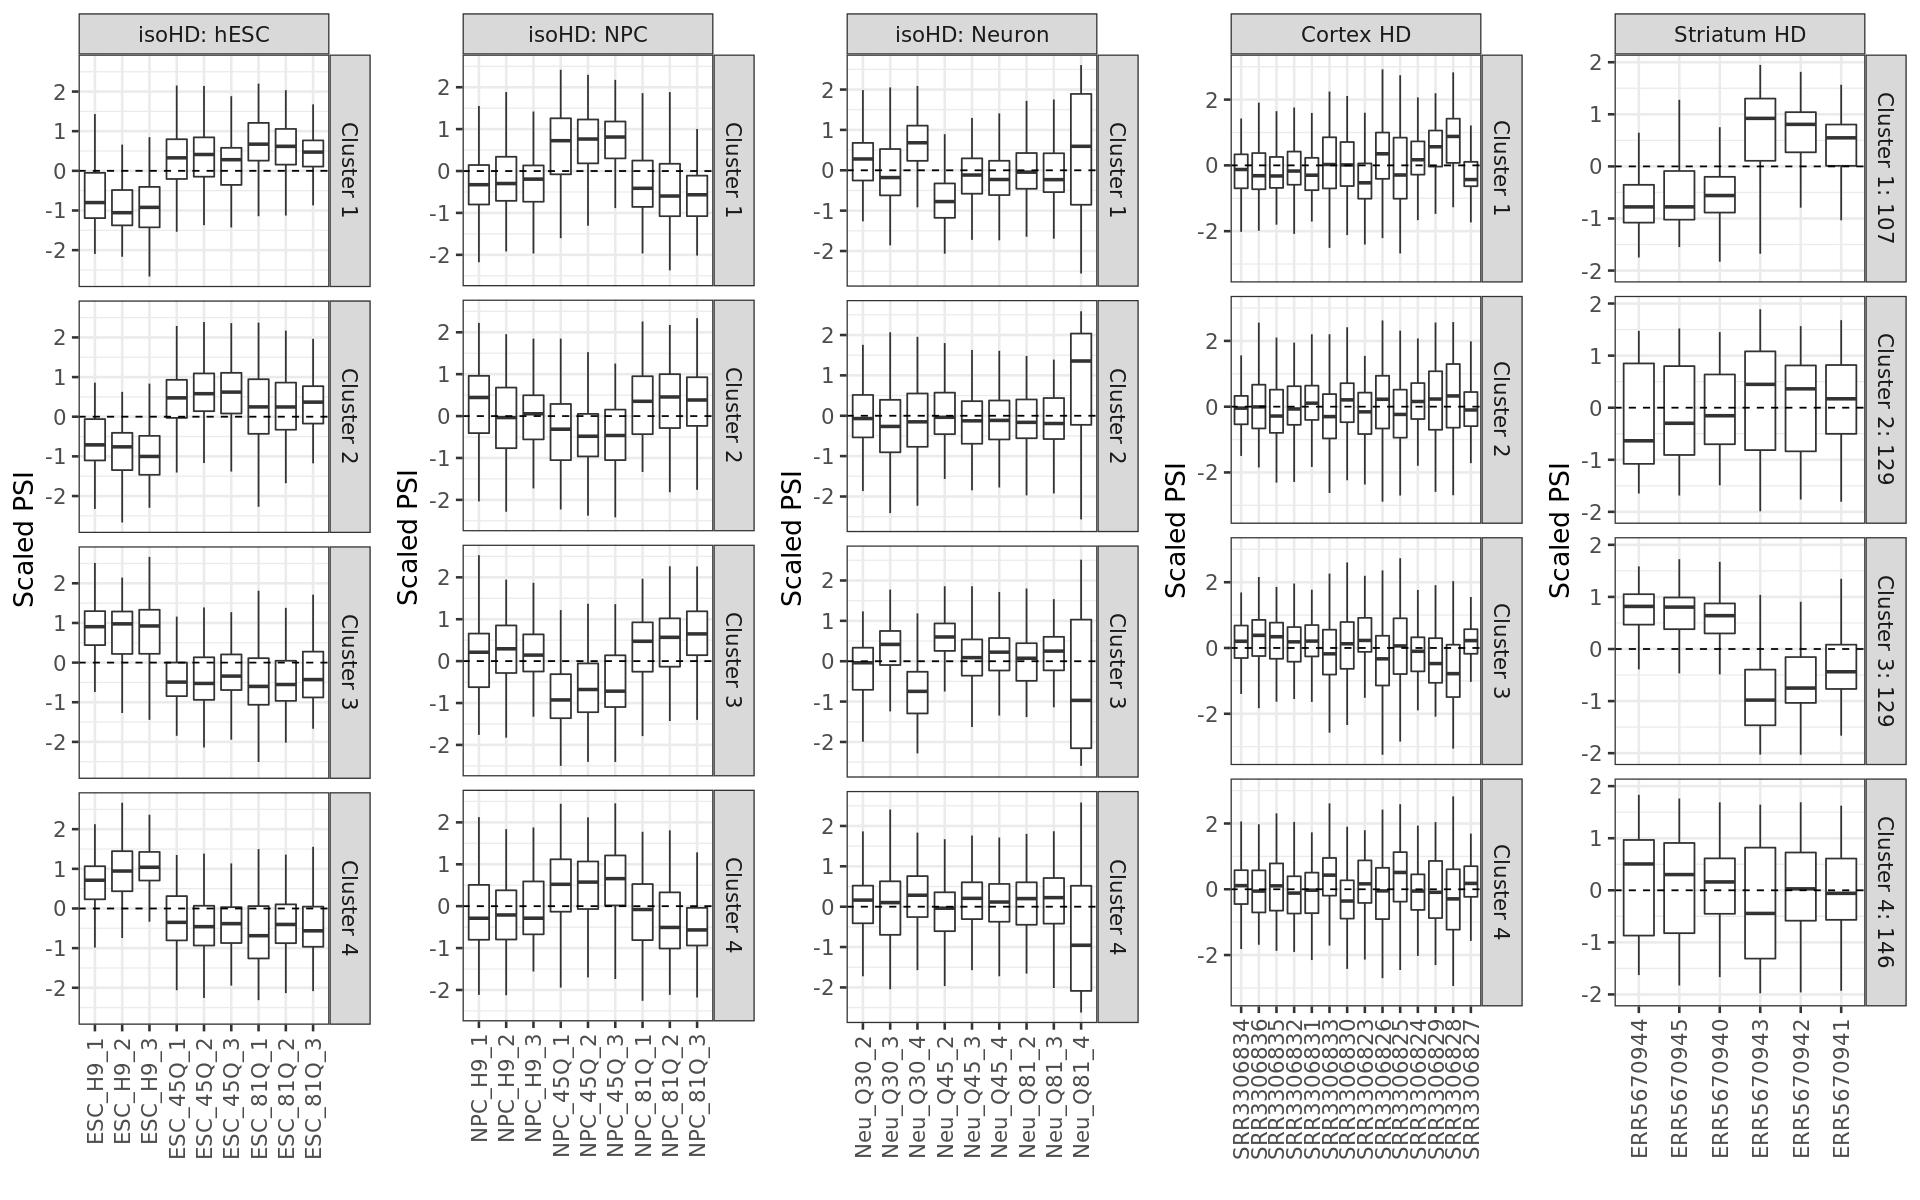

In [15]:
options(repr.plot.height=10,repr.plot.width=16)
grid.arrange(grobs=boxplotglist[c(1,2,3,4,5)],layout_matrix=matrix(1:5,nrow=1))


In [16]:
fuzzyglist <- list()

fuzzyglist[['hesc']] <- readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('ESC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
arrange(membership) %>% 
(function(mydf) {
    mydf$Var1 <- mydf$Var1 %>% as.character %>% factor(levels=mydf$Var1 %>% as.character %>% unique)
    mydf
}) %>% 
subset(membership>=.6) %>% 
(function(mydf) {
mydf %>% ggplot(
    mapping=aes(
        x=Var2 %>% factor(
            levels=coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('ESC',Celltype)) %>% arrange(Qlength) %>% row.names,
            labels=gsub('readsunique.novel.|.bed','',coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('ESC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names)
        ),
        y=value,
        group=Var1,
        color=membership
    )
) +
geom_line(alpha=.8) +
geom_line(
    data=mydf %>% 
    group_by(Var2,cluster) %>% 
    summarise(meanvalue=value %>% mean),
    mapping=aes(y=meanvalue,group='mean'),
    color='black',size=2
) +
geom_hline(yintercept=0,linetype='dashed',size=.5) +
scale_color_gradientn(guide=FALSE,
    colours=colorRampPalette(colors=c('yellow','green','blue','purple','red'))(255),
    limits=c(.6,1),
    na.value=NA
) +
facet_grid(
    facets=cluster~'isoHD: hESC',
    labeller=labeller(cluster=c('1'='Cluster 1','2'='Cluster 2','3'='Cluster 3','4'='Cluster 4','5'='Cluster 5'))
) +
theme_bw(base_size=16) +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5)) +
labs(x='',y='Scaled PSI')
})

fuzzyglist[['npc']] <- readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('NPC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
arrange(membership) %>% 
(function(mydf) {
    mydf$Var1 <- mydf$Var1 %>% as.character %>% factor(levels=mydf$Var1 %>% as.character %>% unique)
    mydf
}) %>% 
subset(membership>=.6) %>% 
(function(mydf) {
mydf %>% ggplot(
    mapping=aes(
        x=Var2 %>% factor(
            levels=coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('NPC',Celltype)) %>% arrange(Qlength) %>% row.names,
            labels=gsub('readsunique.novel.|.bed','',coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('NPC',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names)
        ),
        y=value,
        group=Var1,
        color=membership
    )
) +
geom_line(alpha=.8) +
geom_line(
    data=mydf %>% 
    group_by(Var2,cluster) %>% 
    summarise(meanvalue=value %>% mean),
    mapping=aes(y=meanvalue,group='mean'),
    color='black',size=2
) +
geom_hline(yintercept=0,linetype='dashed',size=.5) +
scale_color_gradientn(guide=FALSE,
    colours=colorRampPalette(colors=c('yellow','green','blue','purple','red'))(255),
    limits=c(.6,1),
    na.value=NA
) +
facet_grid(
    facets=cluster~'isoHD: NPC',
    labeller=labeller(cluster=c('1'='Cluster 1','2'='Cluster 2','3'='Cluster 3','4'='Cluster 4','5'='Cluster 5'))
) +
theme_bw(base_size=16) +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5)) +
labs(x='',y='Scaled PSI')
})

fuzzyglist[['neuron']] <- readsunique.novel.human_ESCNPCNeu_isoHD_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('Neuron',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
arrange(membership) %>% 
(function(mydf) {
    mydf$Var1 <- mydf$Var1 %>% as.character %>% factor(levels=mydf$Var1 %>% as.character %>% unique)
    mydf
}) %>% 
subset(membership>=.6) %>% 
(function(mydf) {
    mydf %>% 
    ggplot(
        mapping=aes(
            x=Var2 %>% factor(
                levels=coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('Neuron',Celltype)) %>% arrange(Qlength) %>% row.names,
                labels=gsub('readsunique.novel.|.bed','',coldata_ESCNPCNeu_isoHD2 %>% subset(grepl('Neuron',Celltype)) %>% arrange(Qlength,Replicate) %>% row.names)
            ),
            y=value,
            group=Var1,
            color=membership
        )
    ) +
    geom_line(alpha=.8) +
    geom_line(
        data=mydf %>% 
        group_by(Var2,cluster) %>% 
        summarise(meanvalue=value %>% mean),
        mapping=aes(y=meanvalue,group='mean'),
        color='black',size=2
    ) +
geom_hline(yintercept=0,linetype='dashed',size=.5) +
    scale_color_gradientn(guide=FALSE,
        colours=colorRampPalette(colors=c('yellow','green','blue','purple','red'))(255),
        limits=c(.6,1),
        na.value=NA
    ) +
    facet_grid(
        facets=cluster~'isoHD: Neuron',
        labeller=labeller(cluster=c('1'='Cluster 1: 107','2'='Cluster 2: 129','3'='Cluster 3: 129','4'='Cluster 4: 146','5'='Cluster 5'))
    ) +
    theme_bw(base_size=16) +
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5),legend.title=element_text(size=12),legend.text=element_text(size=10)) +
    labs(x='',y='Scaled PSI')
})

fuzzyglist[['cortex']] <- readsunique.novel.human_cortex_hd_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_cortex_hd %>% arrange(Diagnosis) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
arrange(membership) %>% 
(function(mydf) {
    mydf$Var1 <- mydf$Var1 %>% as.character %>% factor(levels=mydf$Var1 %>% as.character %>% unique)
    mydf
}) %>% 
subset(membership>=.6) %>% 
(function(mydf) {
mydf %>% ggplot(
    mapping=aes(
        x=Var2 %>% factor(
            levels=coldata_cortex_hd %>% arrange(Diagnosis) %>% row.names,
            labels=gsub('readsunique.novel.|.bed','',coldata_cortex_hd %>% arrange(Diagnosis) %>% row.names)
        ),
        y=value,
        group=Var1,
        color=membership
    )
) +
geom_line(color='gray20',alpha=.9) +
geom_line(
    data=mydf %>% 
    group_by(Var2,cluster) %>% 
    summarise(meanvalue=value %>% mean),
    mapping=aes(y=meanvalue,group='mean'),
    color='black',size=2
) +
geom_hline(yintercept=0,linetype='dashed',size=.5) +
scale_color_gradientn(guide=FALSE,
    colours=colorRampPalette(colors=c('yellow','green','blue','purple','red'))(255),
    limits=c(.6,1),
    na.value=NA
) +
facet_grid(
    facets=cluster~'Cortex HD',
    labeller=labeller(cluster=c('1'='Cluster 1','2'='Cluster 2','3'='Cluster 3','4'='Cluster 4','5'='Cluster 5'))
) +
theme_bw(base_size=16) +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5)) +
labs(x='',y='Scaled PSI')
})

fuzzyglist[['striatum']] <- readsunique.novel.human_striatum_hd_perind_logit.constcounts.known2[
    isohdcortexstriatum.alljunctions.naomit,
    coldata_Striatum_HD %>% arrange(Condition) %>% row.names
] %>% 
t %>% scale %>% t %>% 
melt %>% 
(function(mydf) {
    mydf %>% 
    data.frame(
        cluster=isohdcortexstriatum.mfuzz.list[['4']]$cluster[mydf$Var1] %>% factor,
        membership=isohdcortexstriatum.alljunctions.naomit.notstable.membership[mydf$Var1]
    )
}) %>% 
arrange(membership) %>% 
(function(mydf) {
    mydf$Var1 <- mydf$Var1 %>% as.character %>% factor(levels=mydf$Var1 %>% as.character %>% unique)
    mydf
}) %>% 
subset(membership>=.6) %>% 
(function(mydf) {
mydf %>% ggplot(
    mapping=aes(
        x=Var2 %>% factor(
            levels=coldata_Striatum_HD %>% arrange(Condition) %>% row.names,
            labels=gsub('readsunique.novel.|.bed','',coldata_Striatum_HD %>% arrange(Condition) %>% row.names)
        ),
        y=value,
        group=Var1,
        color=membership
    )
) +
geom_line(color='gray20',alpha=.8) +
geom_line(
    data=mydf %>% 
    group_by(Var2,cluster) %>% 
    summarise(meanvalue=value %>% mean),
    mapping=aes(y=meanvalue,group='mean'),
    color='black',size=2
) +
geom_hline(yintercept=0,linetype='dashed',size=.5) +
scale_color_gradientn(guide=FALSE,
    colours=colorRampPalette(colors=c('yellow','green','blue','purple','red'))(255),
    limits=c(.6,1),
    na.value=NA
) +
facet_grid(
    facets=cluster~'Striatum HD',
    labeller=labeller(cluster=c('1'='Cluster 1','2'='Cluster 2','3'='Cluster 3','4'='Cluster 4','5'='Cluster 5')),
    drop=FALSE
) +
theme_bw(base_size=16) +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=.5)) +
labs(x='',y='Scaled PSI')
})


`summarise()` regrouping output by 'Var2' (override with `.groups` argument)

`summarise()` regrouping output by 'Var2' (override with `.groups` argument)

`summarise()` regrouping output by 'Var2' (override with `.groups` argument)

`summarise()` regrouping output by 'Var2' (override with `.groups` argument)

`summarise()` regrouping output by 'Var2' (override with `.groups` argument)



Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


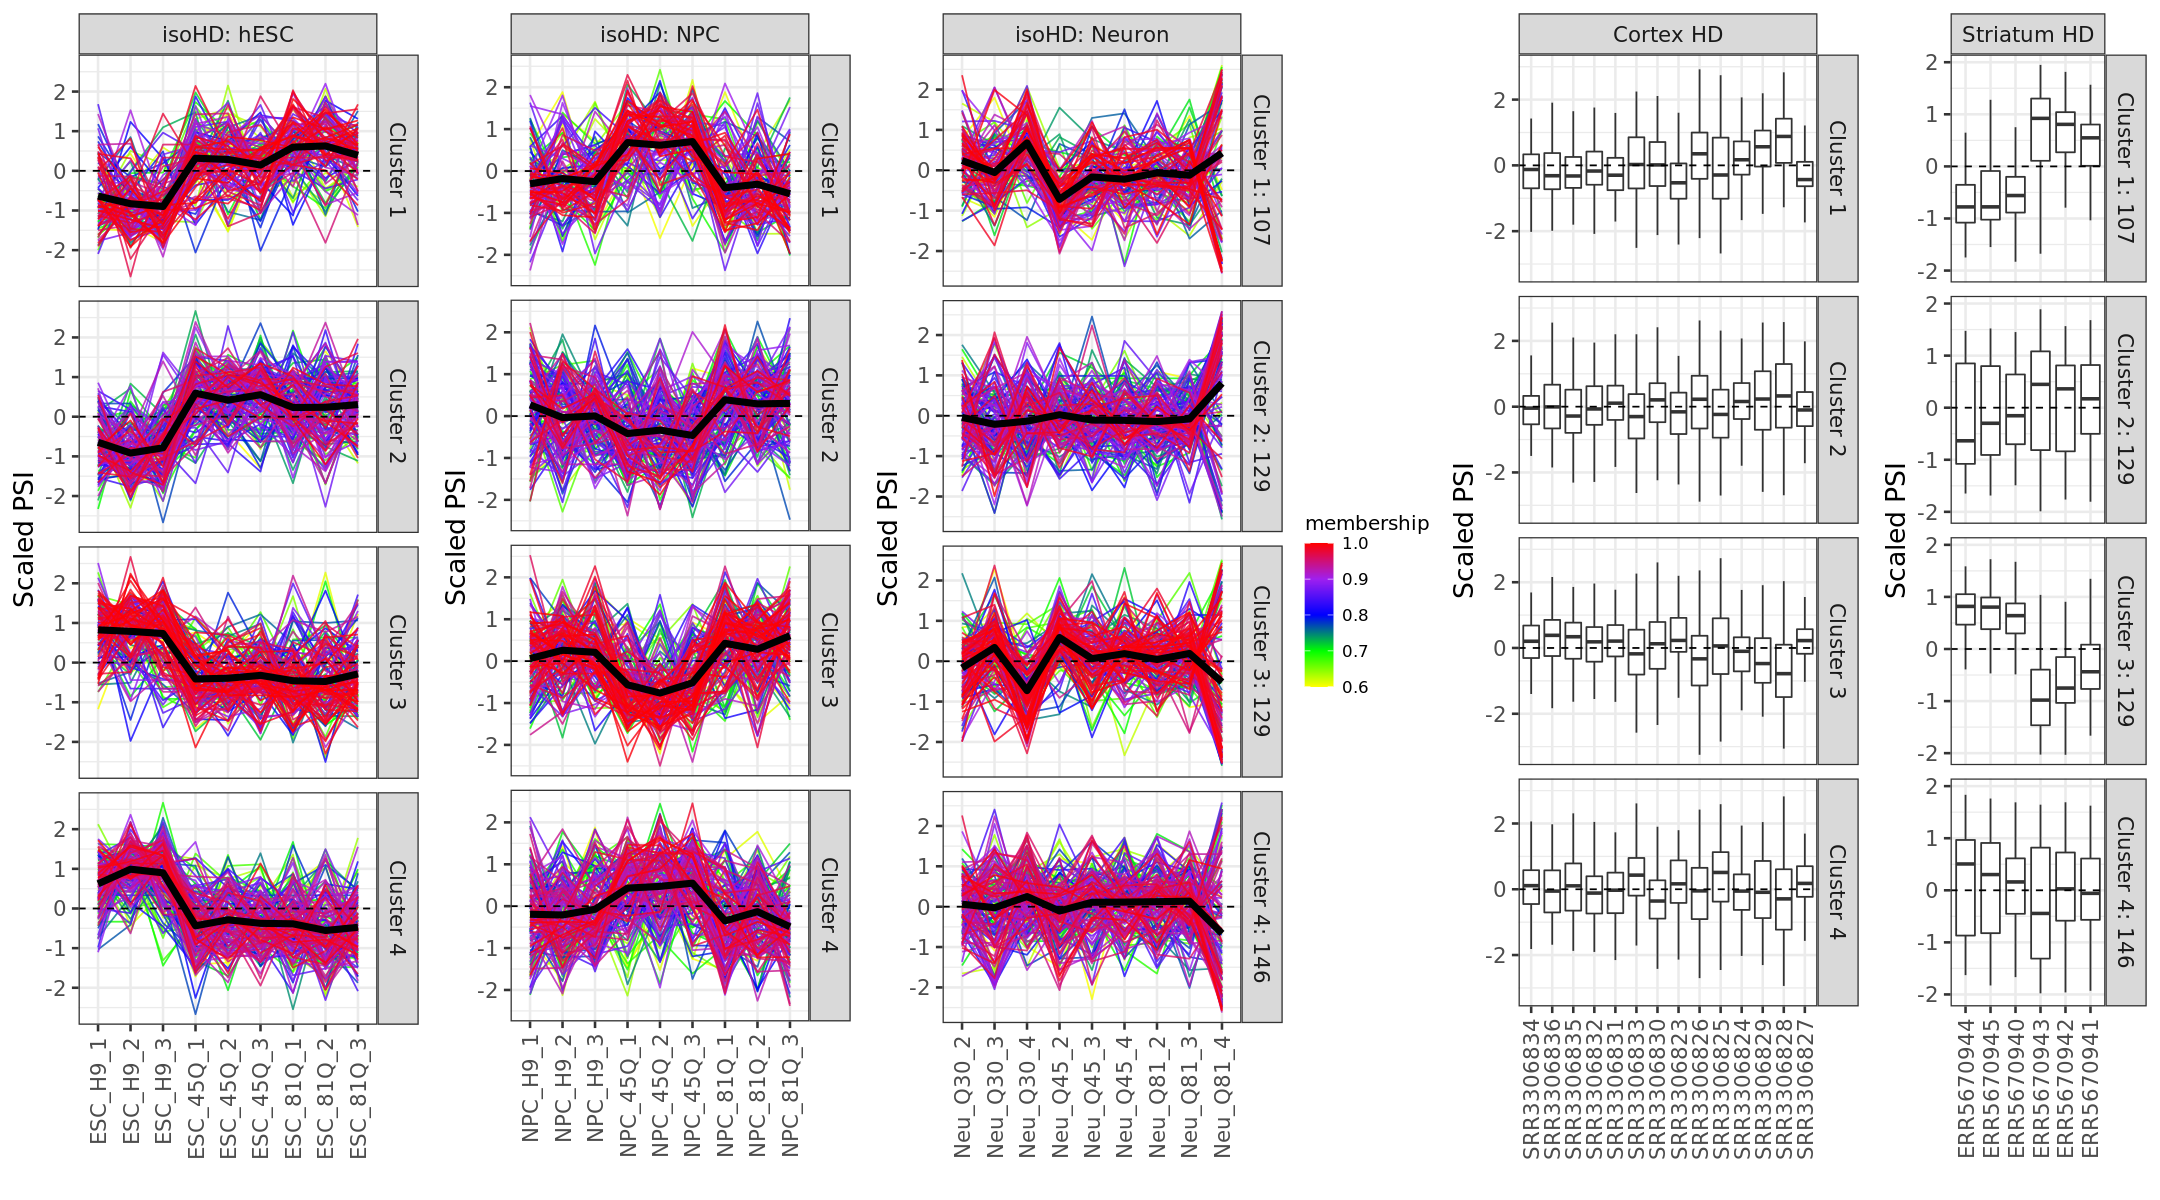

In [17]:
options(repr.plot.height=10,repr.plot.width=17)
grid.arrange(grobs=fuzzyglist[c(1,2,3,4,5)],layout_matrix=matrix(c(1,1,1,2,2,2,3,3,3,4,4,4,5,5,5),nrow=1))


Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


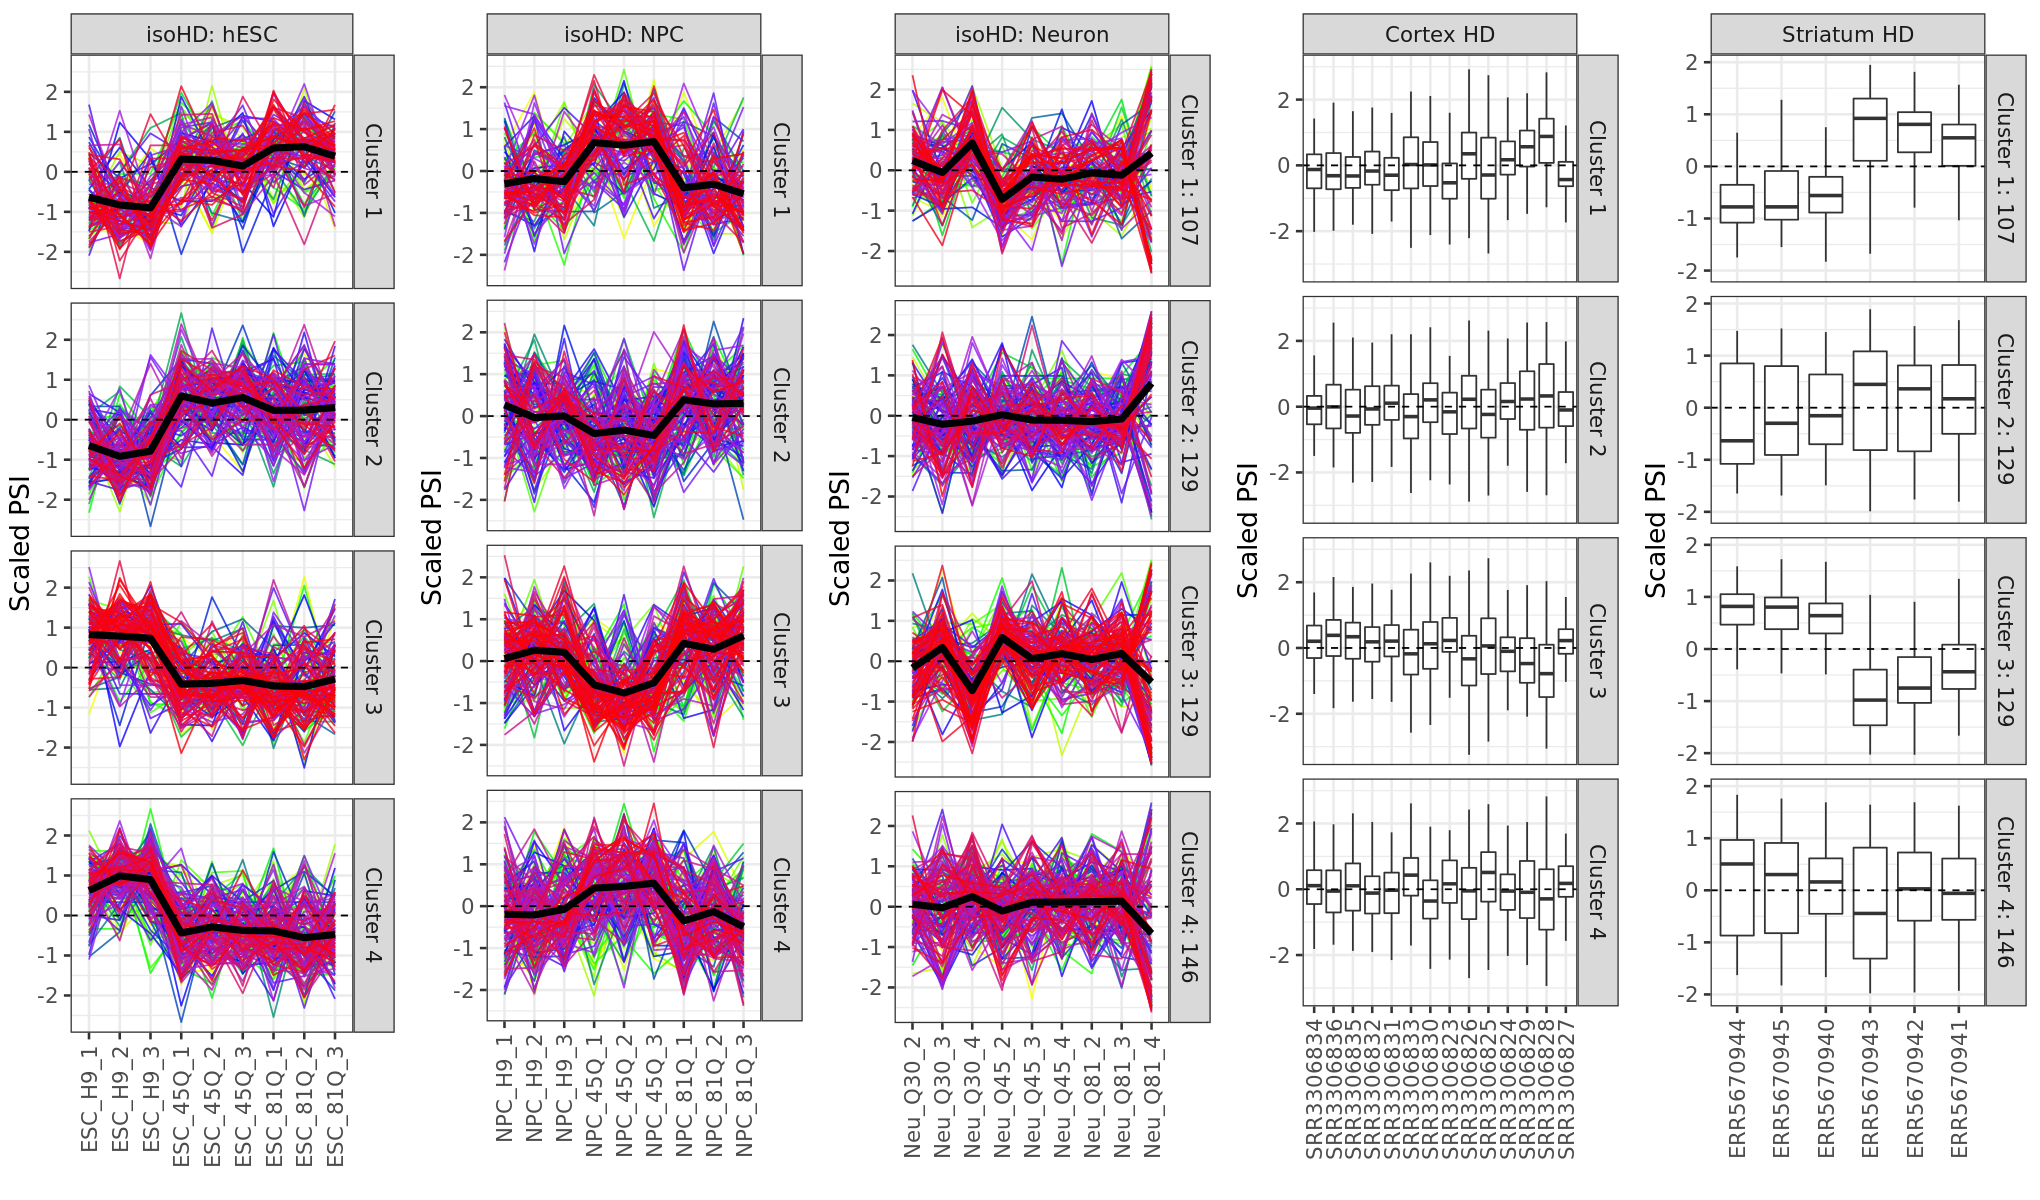

In [18]:
options(repr.plot.height=10,repr.plot.width=17)
grid.arrange(grobs=append(fuzzyglist[c(1,2,3)],boxplotglist[c(4,5)]),layout_matrix=matrix(c(1,1,1,2,2,2,3,3,3,4,4,4,5,5,5),nrow=1))


## 3.4. Functional enrichment of Gene Ontology terms

In [19]:
geneidsuniverse <- hg38samtags %>% 
subset(gene_name %in% (
    filtered.human_ESCNPCNeu_isoHD.leafcutter_highlyused.novel.tsv %>% with(genes) %>% unique %>% strsplit(split=',') %>% unlist %>% unique
)) %>% 
with(gene_id) %>% 
unique

hs_mart <- useEnsembl(biomart='genes',dataset="hsapiens_gene_ensembl",mirror='asia')
genesuniverseBM <- getBM(
    filters = "ensembl_gene_id", 
    attributes = c('ensembl_gene_id','entrezgene_id','hgnc_symbol','description'),
    values = geneidsuniverse,
    mart = hs_mart,
    useCache = FALSE
)
genesuniverseBM$entrezgene_id <- genesuniverseBM$entrezgene_id %>% as.character
entrezgeneidsuniverse <- genesuniverseBM %>% subset(ensembl_gene_id %in% geneidsuniverse) %>% with(entrezgene_id %>% as.character %>% unique)



Batch submitting query [=======>-----------------------]  25% eta:  8s

Batch submitting query [===============>---------------]  50% eta:  6s

Batch submitting query [======================>--------]  75% eta:  3s
                                                                      



In [20]:
isohdcortexstriatum.mfuzz.list.enrichGOBP <- leafcutterAStable_human_ESCNPCNeu_isoHD.robustintronjunctionsintersectlistlongrenameddf.vastdbevents2.tsv %>% 
subset(JunctionName %in% (
    isohdcortexstriatum.alljunctions.naomit.notstable.membership %>% names %>% 
    subset(isohdcortexstriatum.alljunctions.naomit.notstable.membership>=.6)
)) %>% 
with(ensembl_gene_id) %>% as.character %>% strsplit(split=',') %>% unlist %>% unique %>% sort %>% 
enrichGO(
    OrgDb=org.Hs.eg.db,
    keyType='ENSEMBL',
    ont='BP',
    pvalueCutoff=1,
    qvalueCutoff=1,
    universe=genesuniverseBM$ensembl_gene_id
)


In [21]:
isohdcortexstriatum.mfuzz.list.enrichGOBP2 <- isohdcortexstriatum.mfuzz.list.enrichGOBP %>% 
pairwise_termsim %>% 
simplify(cutoff=0.6,by="p.adjust",select_fun=min)


In [22]:
isohdcortexstriatum.mfuzz.list.enrichGOBP2 %>% 
data.frame %>% 
subset(qvalue<=.1)


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0043242,GO:0043242,negative regulation of protein-containing complex disassembly,9/252,72/13203,8.694720e-06,0.01332087,0.01244551,ENSG00000038532/ENSG00000074054/ENSG00000118200/ENSG00000145016/ENSG00000148700/ENSG00000156304/ENSG00000158856/ENSG00000163539/ENSG00000197694,9
GO:0016569,GO:0016569,covalent chromatin modification,23/252,432/13203,9.021924e-06,0.01332087,0.01244551,ENSG00000004487/ENSG00000005483/ENSG00000036549/ENSG00000061273/ENSG00000099956/ENSG00000100393/ENSG00000105127/ENSG00000108773/ENSG00000120071/ENSG00000127663/ENSG00000135655/ENSG00000140632/ENSG00000142453/ENSG00000147050/ENSG00000147180/ENSG00000147548/ENSG00000153922/ENSG00000166313/ENSG00000172977/ENSG00000183337/ENSG00000184304/ENSG00000187531/ENSG00000227345,23
GO:0010639,GO:0010639,negative regulation of organelle organization,20/252,370/13203,2.851218e-05,0.02104911,0.01966590,ENSG00000004487/ENSG00000038532/ENSG00000074054/ENSG00000078018/ENSG00000087470/ENSG00000099956/ENSG00000103197/ENSG00000107960/ENSG00000108773/ENSG00000115317/ENSG00000116670/ENSG00000118200/ENSG00000142459/ENSG00000147601/ENSG00000148700/ENSG00000154473/ENSG00000158856/ENSG00000163539/ENSG00000183337/ENSG00000197694,20
GO:0010975,GO:0010975,regulation of neuron projection development,23/252,485/13203,5.600666e-05,0.02756461,0.02575324,ENSG00000004487/ENSG00000078018/ENSG00000087470/ENSG00000091409/ENSG00000100393/ENSG00000101040/ENSG00000107404/ENSG00000118200/ENSG00000127603/ENSG00000142453/ENSG00000142949/ENSG00000147852/ENSG00000148660/ENSG00000160145/ENSG00000163785/ENSG00000166313/ENSG00000169398/ENSG00000174672/ENSG00000184304/ENSG00000197283/ENSG00000197555/ENSG00000198910/ENSG00000213672,23
GO:0051893,GO:0051893,regulation of focal adhesion assembly,7/252,58/13203,1.113041e-04,0.03902141,0.03645717,ENSG00000065613/ENSG00000074054/ENSG00000115109/ENSG00000127603/ENSG00000158856/ENSG00000163539/ENSG00000169398,7
GO:0090109,GO:0090109,regulation of cell-substrate junction assembly,7/252,58/13203,1.113041e-04,0.03902141,0.03645717,ENSG00000065613/ENSG00000074054/ENSG00000115109/ENSG00000127603/ENSG00000158856/ENSG00000163539/ENSG00000169398,7
GO:0031122,GO:0031122,cytoplasmic microtubule organization,7/252,60/13203,1.384104e-04,0.03902141,0.03645717,ENSG00000065613/ENSG00000074054/ENSG00000095066/ENSG00000107404/ENSG00000109171/ENSG00000118200/ENSG00000204843,7
GO:0007020,GO:0007020,microtubule nucleation,5/252,28/13203,1.670246e-04,0.03902141,0.03645717,ENSG00000074054/ENSG00000109171/ENSG00000141551/ENSG00000163539/ENSG00000204843,5
GO:0007528,GO:0007528,neuromuscular junction development,6/252,44/13203,1.750543e-04,0.03902141,0.03645717,ENSG00000107404/ENSG00000151150/ENSG00000160145/ENSG00000167535/ENSG00000198722/ENSG00000204843,6


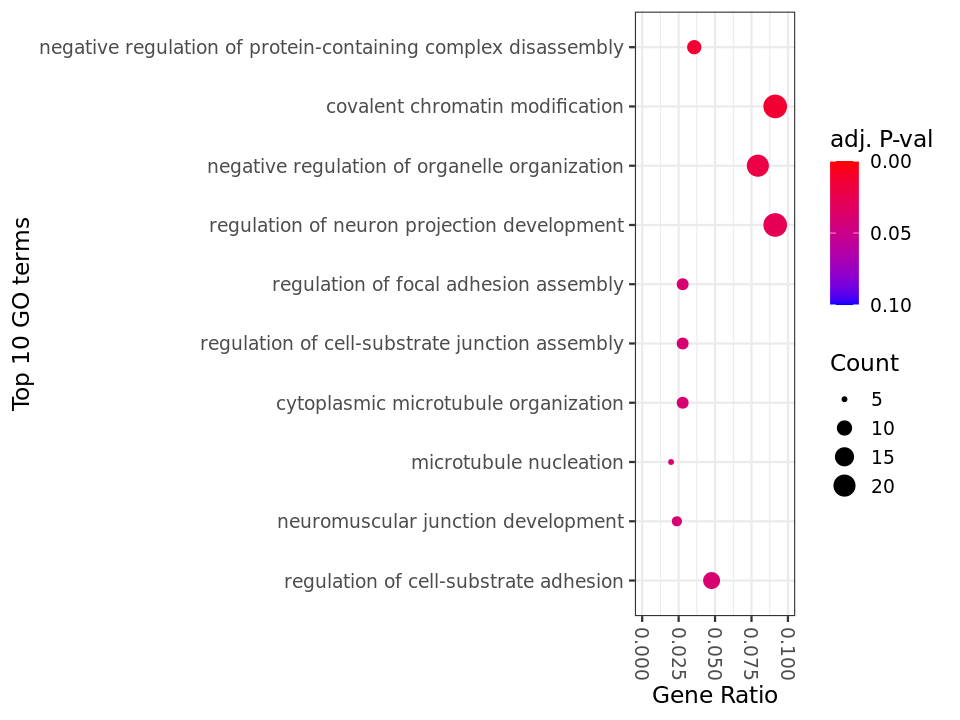

In [23]:
options(repr.plot.height=6,repr.plot.width=8)
g <- isohdcortexstriatum.mfuzz.list.enrichGOBP2 %>% data.frame %>% 
mutate(
    gene.ratio=((gsub('/.*','',GeneRatio) %>% as.numeric)/(gsub('.*/','',GeneRatio) %>% as.numeric)),
    bg.ratio=((gsub('/.*','',BgRatio) %>% as.numeric)/(gsub('.*/','',BgRatio) %>% as.numeric))
) %>% 
mutate(
    enrichment.score=gene.ratio/bg.ratio
) %>% 
head(n=10) %>% 
ggplot(
    mapping=aes(
        x=gene.ratio,
        y=Description %>% factor(levels=Description %>% rev),
        color=p.adjust,
        size=Count
    )
) +
geom_point() +
scale_color_gradient(name='adj. P-val',low='red',high='blue',limits=c(0,.1),breaks=c(0,.05,.1)) +
theme_bw(base_size=14) +
guides(color=guide_colorbar(reverse=TRUE)) +
coord_cartesian(xlim=c(0,.1)) +
labs(x='Gene Ratio',y='Top 10 GO terms') +
theme(axis.text.x=element_text(angle=270,vjust=.5))

g


In [24]:
sessionInfo()


R version 4.0.2 (2020-06-22)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /opt/miniconda3/lib/libopenblasp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] tcltk     parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] enrichplot_1.10.1      Mfuzz_2.50.0           DynDoc_1.68.0         
 [4] widgetTools_1.68.0     e1071_1.7-4            reshape2_1.4.4        
 [7] gridExtra_2.3          ggplotify_0.1.0        dendsort_0.3.4        
[10] dendextend_1.15.1      DT_0.16                pheatma